In [122]:
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
all_data = pd.read_excel("../Case/Milestones Case Data.xlsx", header=0, sheet_name=None)
all_data.keys()

dict_keys(['Projects', 'Milestones'])

In [148]:
data = all_data['Milestones']
data = data[['Title', 'Actual', 'Project', "WDF Indicator"]]
data = data.dropna(subset=["Project"])

In [149]:
currency_data = all_data['Projects']
currency_data = currency_data[['WDF ID', 'Total Revised WDF Contibution', 'WDF Grant Currency', "Countries"]]

In [150]:
def get_currency(project):
    return currency_data[currency_data["WDF ID"] == project]['WDF Grant Currency'].values[0]

data["currency"] = data["Project"].apply(get_currency)

def get_country(project):
    return currency_data[currency_data["WDF ID"] == project]['Countries'].values[0]

data["country"] = data["Project"].apply(get_country)

----

In [151]:
data

,Title,Actual,Project,WDF Indicator,currency,country
0,"5,000 patient consultations, including screeni...",7524.0,WDF14-0909,11.11 N (%) of persons identified with T2DM ri...,USD,Guatemala
1,22.10. 500 persons screened for diabetes relat...,785.0,WDF16-1429,12.10 N of patients screened for diabetes rela...,EUR,Cameroon
2,"1,000 people reached through awareness activit...",2520.0,WDF13-0797,21.12 N of persons reached at awareness activi...,USD,Egypt
3,11.14. Electronic Medical Record system streng...,NaN,WDF15-1234,NaN,USD,Brazil
4,"11.13. 1,250 patients treated at strengthened ...",1956.0,WDF16-1429,11.13 N of patients received treatment at esta...,EUR,Cameroon
...,...,...,...,...,...,...
25554,40 health care professionals retrained in diag...,40.0,WDF13-0797,14.04 N of other HCP (please specify) trained ...,USD,Egypt
25555,"11.14. 1,500 diabetes patients entered into re...",1730.0,WDF16-1429,11.14 N (%) of patients in registry,EUR,Cameroon
25556,11.04. Capacity building of 42 primary health ...,50.0,WDF15-1234,11.01 N of health facilities strengthened/esta...,USD,Brazil
25557,10 midviwes retrained in diagnosis and managem...,10.0,WDF13-0797,14.04 N of other HCP (please specify) trained ...,USD,Egypt


getting dollars pr screening

In [152]:
def screening(indicator):
    return "11.09" == indicator[:5]

data = data.dropna(subset=["Title", "Actual"])
data["screening"] = data["Title"].apply(screening)
data = data[data["screening"]]
data

/var/folders/pl/7f1cr2657p3bnpdt3bnm_9w00000gn/T/ipykernel_20440/1743473727.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["screening"] = data["Title"].apply(screening)


,Title,Actual,Project,WDF Indicator,currency,country,screening
47,"11.09. 3,500 people screened for T2DM, accumul...",5862.0,WDF16-1429,11.09 N of persons screened for diabetes,EUR,Cameroon,True
1010,"11.09. 280 persons screened for T2DM, accumula...",462.0,WDF15-1303,11.09 N of persons screened for diabetes,USD,Cambodia,True
1048,"11.09. 280 persons screened for T2DM, accumula...",1467.0,WDF15-1303,11.09 N of persons screened for diabetes,USD,Cambodia,True
1098,"11.09. 280 persons screened for T2DM, accumula...",2321.0,WDF15-1303,11.09 N of persons screened for diabetes,USD,Cambodia,True
1140,"11.09. 280 persons screened for T2DM, accumula...",6570.0,WDF15-1303,11.09 N of persons screened for diabetes,USD,Cambodia,True
...,...,...,...,...,...,...,...
25214,11.09. 416 people screened with Hba1c test to ...,0.0,WDF16-1441,11.09 N of persons screened for diabetes,USD,Nepal,True
25248,11.09. 416 people screened with Hba1c test to ...,382.0,WDF16-1441,11.09 N of persons screened for diabetes,USD,Nepal,True
25249,11.09. 850 people screened with Hba1c test to ...,4692.0,WDF16-1441,11.09 N of persons screened for diabetes,USD,Nepal,True
25436,"11.09. 3,000 people screened for T2DM",4654.0,WDF16-1429,11.09 N of persons screened for diabetes,EUR,Cameroon,True


In [153]:
import numpy as np
import re

def find_number(title):
    pattern = r'(\d)\1\.(\d)\2'
    if "11.09" in title:
        title = title[5:]
    pattern = r'\b\d+(?:[,.]?\d+)*(?:,\s*|\.\s*)?\d*\b'
    matches = re.findall(pattern, title)
    if len(matches) == 0:
        return np.nan
    if float(matches[0].replace(",", "")) < 10:
        print("BE CAREFUL", matches, title)
    elif len(matches) == 1:
        # print("Nice : ", matches, title)
        return matches[0]
    else:
        print("WARNING: ", matches, title)
        return matches[0]


In [154]:
data["N"] = data["Title"].apply(find_number)

BE CAREFUL ['1.000'] . 1.000 persons screened for T2DM


In [155]:
data = data.dropna(subset=["N"])
data

,Title,Actual,Project,WDF Indicator,currency,country,screening,N
47,"11.09. 3,500 people screened for T2DM, accumul...",5862.0,WDF16-1429,11.09 N of persons screened for diabetes,EUR,Cameroon,True,"3,500"
1010,"11.09. 280 persons screened for T2DM, accumula...",462.0,WDF15-1303,11.09 N of persons screened for diabetes,USD,Cambodia,True,280
1048,"11.09. 280 persons screened for T2DM, accumula...",1467.0,WDF15-1303,11.09 N of persons screened for diabetes,USD,Cambodia,True,280
1098,"11.09. 280 persons screened for T2DM, accumula...",2321.0,WDF15-1303,11.09 N of persons screened for diabetes,USD,Cambodia,True,280
1140,"11.09. 280 persons screened for T2DM, accumula...",6570.0,WDF15-1303,11.09 N of persons screened for diabetes,USD,Cambodia,True,280
...,...,...,...,...,...,...,...,...
25214,11.09. 416 people screened with Hba1c test to ...,0.0,WDF16-1441,11.09 N of persons screened for diabetes,USD,Nepal,True,416
25248,11.09. 416 people screened with Hba1c test to ...,382.0,WDF16-1441,11.09 N of persons screened for diabetes,USD,Nepal,True,416
25249,11.09. 850 people screened with Hba1c test to ...,4692.0,WDF16-1441,11.09 N of persons screened for diabetes,USD,Nepal,True,850
25436,"11.09. 3,000 people screened for T2DM",4654.0,WDF16-1429,11.09 N of persons screened for diabetes,EUR,Cameroon,True,"3,000"


In [156]:
converter = {"USD": 6.93, "EUR": 7.46, "DKK": 1}
country_estimation = {}

for i, row in data.iterrows():
    true_value = row["Actual"] * converter[row["currency"]]
    if row["country"] not in country_estimation:
        country_estimation[row["country"]] = []
    if true_value == 0:
        continue
    country_estimation[row["country"]].append((true_value / float(row["N"].replace(",", "").replace(".", "")),float(row["N"].replace(",", "").replace(".", "")),  true_value))

country_estimation

{'Cameroon': [(12.494434285714284, 3500.0, 43730.52),
  (3.9466349999999997, 2000.0, 7893.2699999999995),
  (1.37907, 2000.0, 2758.14),
  (7.9695, 2000.0, 15939.0),
  (11.572946666666665, 3000.0, 34718.84),
  (25.329897142857142, 3500.0, 88654.64)],
 'Cambodia': [(11.4345, 280.0, 3201.66),
  (36.30825, 280.0, 10166.31),
  (57.44475, 280.0, 16084.529999999999),
  (162.6075, 280.0, 45530.1)],
 'Lebanon': [(11.431015384615385, 1300.0, 14860.32),
  (9.204492307692307, 1950.0, 17948.76),
  (7.268717948717948, 1950.0, 14174.0)],
 'Uzbekistan': [(20.77323076923077, 3900.0, 81015.6),
  (14.227558974358976, 3900.0, 55487.48)],
 'Ethiopia': [(10.356966666666667, 3000.0, 31070.9),
  (13.701533333333332, 3000.0, 41104.6),
  (2.34244, 4000.0, 9369.76),
  (6.199260000000001, 4000.0, 24797.04)],
 'Malaysia': [(6.2832, 150.0, 942.48),
  (8.639399999999998, 150.0, 1295.9099999999999),
  (2.541, 300.0, 762.3),
  (1.9866000000000001, 150.0, 297.99),
  (20.235599999999998, 150.0, 3035.3399999999997),
  (5

In [166]:
country_estimation.pop(np.nan)
country_estimation.keys()

dict_keys(['Cameroon', 'Cambodia', 'Lebanon', 'Uzbekistan', 'Ethiopia', 'Malaysia', 'Mexico', 'Kenya', 'Ivory Coast', 'Nepal', 'Papua New Guinea', 'India', 'Nigeria', 'Philippines', 'Dominican Republic', 'Indonesia', 'Georgia', 'Colombia', 'Togo', 'Burkina Faso', 'Comoros', 'Mali', 'Guatemala', 'Liberia', 'Senegal', 'South Africa', 'Peru', 'Lesotho', 'Bangladesh', 'Niger', 'Malawi', 'Guinea-Conakry', 'Sierra Leone', 'Afghanistan', 'China', 'Democratic Republic of the Congo', 'Sudan'])

In [213]:
country_population = {
    'Cameroon': 26545864,
    'Cambodia': 16718971,
    'Lebanon': 6825445,
    'Uzbekistan': 34232050,
    'Ethiopia': 118015000,
    'Malaysia': 32722760,
    'Mexico': 126190788,
    'Kenya': 53771296,
    'Ivory Coast': 26378274,
    'Nepal': 29609623,
    'Papua New Guinea': 8947027,
    'India': 1380004385,
    'Nigeria': 206139587,
    'Philippines': 113261000,
    'Dominican Republic': 10882996,
    'Indonesia': 273523615,
    'Georgia': 3989167,
    'Colombia': 50882891,
    'Togo': 8278724,
    'Burkina Faso': 21510181,
    'Comoros': 869601,
    'Mali': 20250833,
    'Guatemala': 18249323,
    'Liberia': 5057681,
    'Senegal': 16743927,
    'South Africa': 60041939,
    'Peru': 32971846,
    'Lesotho': 2142249,
    'Bangladesh': 164689383,
    'Niger': 24206636,
    'Malawi': 19129952,
    'Guinea-Conakry': 13132792,
    'Sierra Leone': 7976983,
    'Afghanistan': 38928346,
    'China': 1439323776,
    'Democratic Republic of the Congo': 89561404,
    'Sudan': 43849260
}

country_population = {k: v/100000000 for k, v in country_population.items()}
country_population


{'Cameroon': 0.26545864,
 'Cambodia': 0.16718971,
 'Lebanon': 0.06825445,
 'Uzbekistan': 0.3423205,
 'Ethiopia': 1.18015,
 'Malaysia': 0.3272276,
 'Mexico': 1.26190788,
 'Kenya': 0.53771296,
 'Ivory Coast': 0.26378274,
 'Nepal': 0.29609623,
 'Papua New Guinea': 0.08947027,
 'India': 13.80004385,
 'Nigeria': 2.06139587,
 'Philippines': 1.13261,
 'Dominican Republic': 0.10882996,
 'Indonesia': 2.73523615,
 'Georgia': 0.03989167,
 'Colombia': 0.50882891,
 'Togo': 0.08278724,
 'Burkina Faso': 0.21510181,
 'Comoros': 0.00869601,
 'Mali': 0.20250833,
 'Guatemala': 0.18249323,
 'Liberia': 0.05057681,
 'Senegal': 0.16743927,
 'South Africa': 0.60041939,
 'Peru': 0.32971846,
 'Lesotho': 0.02142249,
 'Bangladesh': 1.64689383,
 'Niger': 0.24206636,
 'Malawi': 0.19129952,
 'Guinea-Conakry': 0.13132792,
 'Sierra Leone': 0.07976983,
 'Afghanistan': 0.38928346,
 'China': 14.39323776,
 'Democratic Republic of the Congo': 0.89561404,
 'Sudan': 0.4384926}

In [211]:
india_states_population = {
    "Andhra Pradesh": 53903393,
    "Arunachal Pradesh": 1570458,
    "Assam": 35607039,
    "Bihar": 124799926,
    "Chandigarh": 1179614,
    "Chhattisgarh": 29436231,
    "Delhi": 18710922,
    "Goa": 1586250,
    "Gujarat": 63872399,
    "Haryana": 28941133,
    "Himachal Pradesh": 7307914,
    "Jharkhand": 38593948,
    "Karnataka": 67562686,
    "Kerala": 35699443,
    "Madhya Pradesh": 85358965,
    "Maharashtra": 123144223,
    "Manipur": 3091545,
    "Meghalaya": 3366710,
    "Mizoram": 1239244,
    "Nagaland": 2249695,
    "Odisha": 46356334,
    "Puducherry": 1506293,
    "Punjab": 30355185,
    "Rajasthan": 81032689,
    "Sikkim": 690251,
    "Tamil Nadu": 77841267,
    "Telangana": 39362732,
    "Tripura": 4169794,
    "Uttar Pradesh": 240928796,
    "Uttarakhand": 11250858,
    "West Bengal": 99609303
}

In [214]:
import pickle

with open("india_states_population.pickle", "wb") as file:
    pickle.dump(india_states_population, file)

with open("countries_population.pickle", "wb") as file:
    pickle.dump(country_population, file)

with open("countries_estimation.pickle", "wb") as file:
    pickle.dump(country_estimation, file)

# Load with:
# with open("india_states_population.pickle", "rb") as file:
#     loaded_population_dict = pickle.load(file)

(array([ 6.,  3.,  2., 10.,  2.,  3.,  5.,  3.,  4.,  5.,  4.,  5.,  5.,
         6.,  3.,  8.,  6., 25., 27., 20.,  8.,  4.,  7.,  8.,  3.,  1.,
         1.,  2.,  1.,  3.,  1.,  2.,  1.,  4.,  2.,  6.,  4.,  1.,  2.,
         0.,  3.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  2.,  2.,  0.,
         1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  3.,
         1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  1.]),
 array([ 0.151074  ,  0.53209926,  0.91312452,  1.29414978,  1.67517504,
         2.0562003 ,  2.43722556,  2.81825082,  3.19927608,  3.58030134,
         3.9613266 ,  4.34235186,  4.72337712,  5.10440238,  5.48542764,
         5.8664529 ,  6.24747816,  6.62850342,  7.00952868,  7.39055394,
         7.7715792 ,  8.15260446,  8.53362972,  8.91465498,  9.29568024,
         9.6767055 , 10.05773076, 10.43875602, 10.81978128, 11.200806

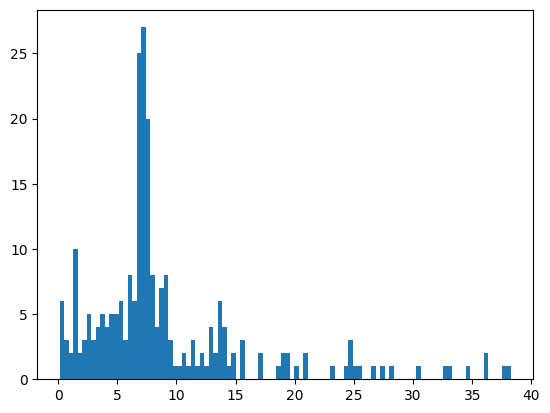

In [222]:
dollar_per_screening = [l[0] for k, v in country_estimation.items() for l in v if l[0] < 50]
dollar_per_screening_high = [l[0] for k, v in country_estimation.items() for l in v if l[0] >= 50]
plt.hist(dollar_per_screening, bins=100)

In [223]:
dollar_per_screening_high

[57.44475,
 162.6075,
 141.51059999999998,
 93.47184,
 56.307635999999995,
 304.4777656675749]